# chap15 실제 데이터로 만들어 보는 모델

In [1]:
# 2010년부터 2016년까지의 부동산 거래 데이터
import pandas as pd

df = pd.read_csv('./data/house_train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
df.dtypes
# df.info()

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [3]:
#  결측값이 있는지 확인
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [4]:
len(df)

1460

In [5]:
# 카테고리 데이터 확인
df.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [6]:
# get_dummies()  함수를 활용하여 -> one-hot-encoding
df = pd.get_dummies(df)

In [9]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [7]:
# 결측값 처리
df = df.fillna(df.mean())

In [8]:
df.isnull().sum().sort_values(ascending=False).head()

Id                  0
HeatingQC_Po        0
BsmtFinType1_BLQ    0
BsmtFinType1_ALQ    0
BsmtExposure_No     0
dtype: int64

In [10]:
#  결측값이 1000개 이상인 컬럼 제거 후 결측값 처리
df = pd.read_csv('./data/house_train.csv')

In [11]:
1460 - df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC             7
MiscFeature       54
Alley             91
Fence            281
FireplaceQu      770
LotFrontage     1201
GarageYrBlt     1379
GarageCond      1379
GarageType      1379
GarageFinish    1379
GarageQual      1379
BsmtFinType2    1422
BsmtExposure    1422
BsmtQual        1423
BsmtCond        1423
BsmtFinType1    1423
MasVnrArea      1452
MasVnrType      1452
Electrical      1459
Id              1460
dtype: int64

In [12]:
# thresh -> Nan이 아닌 값의 개수가 400개 미만인 컬럼 제거
df1 = df.dropna(axis=1,thresh=400)  
print(len(df1.columns))

77


In [42]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [13]:
# one-hot-encoding
df1 = pd.get_dummies(df1)

# 결측값 처리
df1 = df1.fillna(df.mean(numeric_only=True))

df1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [14]:
# 변수들간의 상관관계
df1_corr = df1.corr()

# SalePrice 컬럼에 대한 상관관계를 확인 
df1_corr_sort = df1_corr.sort_values('SalePrice', ascending=False)
df1_corr_sort['SalePrice'].head(20)

SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
FullBath            0.560664
BsmtQual_Ex         0.553105
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
YearRemodAdd        0.507101
KitchenQual_Ex      0.504094
Foundation_PConc    0.497734
MasVnrArea          0.475241
GarageYrBlt         0.470177
Fireplaces          0.466929
ExterQual_Gd        0.452466
ExterQual_Ex        0.451164
BsmtFinType1_GLQ    0.434597
Name: SalePrice, dtype: float64

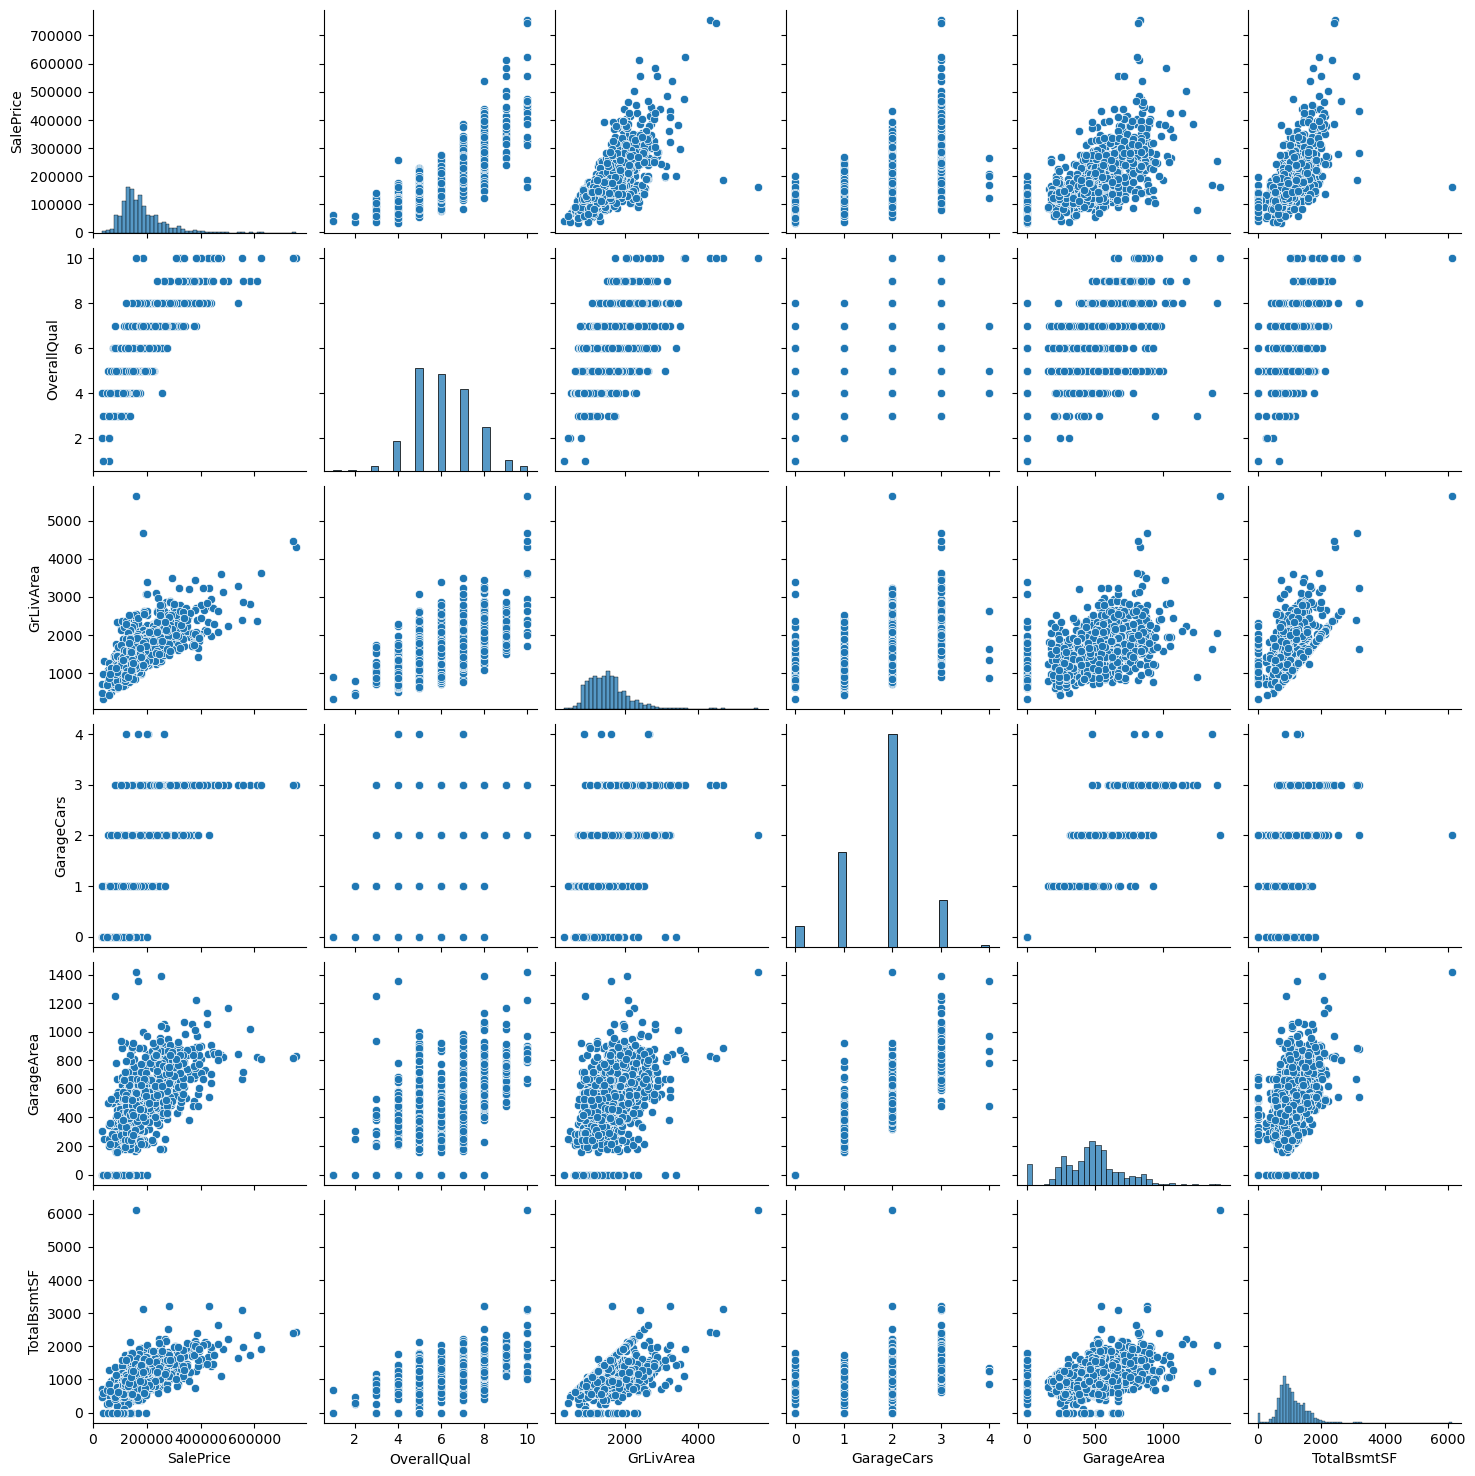

In [15]:
cols = [ 'SalePrice', 'OverallQual', 'GrLivArea',  'GarageCars',   'GarageArea',   'TotalBsmtSF']

import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df1[cols])
plt.show()

In [52]:
# 상관관계가 있는 컬럼만 데이터를 가져옴 , target -> SalePrice
cols_train =  [ 'OverallQual', 'GrLivArea',  'GarageCars',   'GarageArea',   'TotalBsmtSF']
X = df1[cols_train]
X.head()
y = df1['SalePrice']

print(X.shape, y.shape)

(1460, 5) (1460,)


In [79]:
# X 와 y를 학습데이터와 테스트 데이터로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,shuffle=True, random_state=0)

In [54]:
# 모델 생성 -> 학습 , early_stopping, checkpointer  추가해서 모델 실행 -> 검증 데이터는 25%로 설정
# 6 : 2 : 2 -> 학습 : 검증 : 테스트
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [62]:
model = Sequential()
model.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))  # 입력층과 첫번째 레이어 추가
model.add(Dense(40, activation='relu'))   # 두번째 층 추가
model.add(Dense(30, activation='relu'))   # 세번째 층 추가
model.add(Dense(1))   # 출력층 추가
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                180       
                                                                 
 dense_9 (Dense)             (None, 40)                1240      
                                                                 
 dense_10 (Dense)            (None, 30)                1230      
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 2,681
Trainable params: 2,681
Non-trainable params: 0
_________________________________________________________________


In [63]:
# 컴파일
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])  # loss='mean_squred_error'

#  중단점과 모델저장 사용 -> 실행시 옵션
early_stopping_callback = EarlyStopping(patience=10)
checkpointer = ModelCheckpoint(filepath='./data/model/house.hdf5', verbose=0, save_best_only=True)
model.fit(X_train, y_train, epochs=2000, validation_split=0.25, 
          callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
28/28 [==============================] - 1s 7ms/step - loss: 40286003200.0000 - accuracy: 0.0000e+00 - val_loss: 33705250816.0000 - val_accuracy: 0.0000e+00
Epoch 2/2000
28/28 [==============================] - 0s 3ms/step - loss: 39710412800.0000 - accuracy: 0.0000e+00 - val_loss: 33013266432.0000 - val_accuracy: 0.0000e+00
Epoch 3/2000
28/28 [==============================] - 0s 3ms/step - loss: 38440112128.0000 - accuracy: 0.0000e+00 - val_loss: 31275374592.0000 - val_accuracy: 0.0000e+00
Epoch 4/2000
28/28 [==============================] - 0s 4ms/step - loss: 35380436992.0000 - accuracy: 0.0000e+00 - val_loss: 27189592064.0000 - val_accuracy: 0.0000e+00
Epoch 5/2000
28/28 [==============================] - 0s 3ms/step - loss: 28901380096.0000 - accuracy: 0.0000e+00 - val_loss: 19541551104.0000 - val_accuracy: 0.0000e+00
Epoch 6/2000
28/28 [==============================] - 0s 3ms/step - loss: 18106036224.0000 - accuracy: 0.0000e+00 - val_loss: 9073994752.0000 - val_ac

In [64]:
from tensorflow.keras.models import load_model

model1 = load_model('./data/model/house.hdf5')

In [ ]:
model1.evaluate(X_test, y_test)

In [80]:
y_test

529     200624
491     133000
459     110000
279     192000
655      88000
         ...  
326     324000
440     555000
1387    136000
1323     82500
61      101000
Name: SalePrice, Length: 292, dtype: int64

In [78]:
model.predict(X_test).flatten()  # model.predict의 결과가 2차원 배열로 반환 -> 1차원으로 평탄화
y_test.iloc[0]

10/10 [==============================] - 0s 1ms/step


200624

In [85]:
#   모델을 통한 예측값과 실제값을 비교
real_price = []
predict_price = []
X_num = []
n = 0

y_pred = model.predict(X_test).flatten() # model.predict의 결과가 2차원 배열로 반환 -> 1차원으로 평탄화
for i in  range(30):
    real = y_test.iloc[i]
    pred = y_pred[i]
    print('실제 가격 : {:.2f}     예측 가격 :{:.2f}'.format(real, pred))
    real_price.append(real)
    predict_price.append(pred)
    n += 1
    X_num.append(n)

10/10 [==============================] - 0s 1ms/step
실제 가격 : 200624.00     예측 가격 :300396.59
실제 가격 : 133000.00     예측 가격 :159203.25
실제 가격 : 110000.00     예측 가격 :138601.86
실제 가격 : 192000.00     예측 가격 :224973.52
실제 가격 : 88000.00     예측 가격 :115665.73
실제 가격 : 85000.00     예측 가격 :138551.97
실제 가격 : 282922.00     예측 가격 :225253.67
실제 가격 : 141000.00     예측 가격 :167052.98
실제 가격 : 745000.00     예측 가격 :466451.47
실제 가격 : 148800.00     예측 가격 :133411.89
실제 가격 : 208900.00     예측 가격 :190278.53
실제 가격 : 136905.00     예측 가격 :232458.33
실제 가격 : 225000.00     예측 가격 :211856.11
실제 가격 : 123000.00     예측 가격 :123156.83
실제 가격 : 119200.00     예측 가격 :142656.27
실제 가격 : 145000.00     예측 가격 :173251.86
실제 가격 : 190000.00     예측 가격 :201422.95
실제 가격 : 123600.00     예측 가격 :114490.84
실제 가격 : 149350.00     예측 가격 :161669.42
실제 가격 : 155000.00     예측 가격 :174811.53
실제 가격 : 166000.00     예측 가격 :187253.33
실제 가격 : 144500.00     예측 가격 :128740.14
실제 가격 : 110000.00     예측 가격 :131908.64
실제 가격 : 174000.00     예측 가격 :155166.33
실제 가격 : 18500

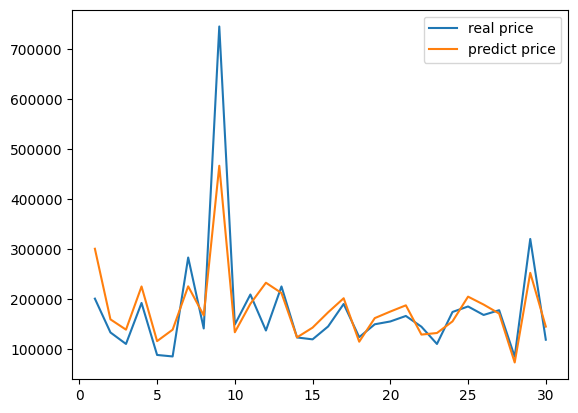

In [86]:
plt.plot(X_num, real_price, label='real price')
plt.plot(X_num, predict_price, label='predict price')
plt.legend()

plt.show()

In [87]:
# house_train.csv 데이터로 학습 ( 검증은 20%로 ) -> 영향력 있는 컬럼만 추출
# df1_corr_sort['SalePrice'] 의 결과가 0.5 이상인 컬럼 추출
# house_test.csv  데이터로 예측  -> 영향력 있는 컬럼만 추출
# 예측값과 실제값을 그래프로 표현

In [99]:
# 학습 데이터 불러옴 : house_train.csv
df = pd.read_csv('./data/house_train.csv')

In [100]:
df = df.dropna(axis=1, thresh=400)

df = pd.get_dummies(df)
df = df.fillna(df.mean())

In [ ]:
df_corr = df.corr().sort_values('SalePrice', ascending=False) #['SalePrice']

cols = df_corr[ (df_corr['SalePrice'] > 0.5) ].index  # SalePrice와 상관 관계가 0.5이상인 컬럼만 추출
print(cols)

cols = cols[cols != 'SalePrice']  # SalePrice 를 제외한 컬럼 추출
print(cols)

In [135]:
df_corr1 = df.corr().sort_values('SalePrice', ascending=False)['SalePrice']
cols = df_corr1[ df_corr1.values > 0.5 ].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd',
       'YearBuilt', 'YearRemodAdd', 'KitchenQual_Ex'],
      dtype='object')

In [136]:
X = df[cols]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [137]:
model = Sequential()
model.add(Dense(40, input_dim=X.shape[1], activation='relu'))  # 입력층과 첫번째 레이어 추가
model.add(Dense(30, activation='relu'))   # 두번째 층 추가
model.add(Dense(10, activation='relu'))   # 세번째 층 추가
model.add(Dense(1))   # 출력층 추가
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 40)                560       
                                                                 
 dense_25 (Dense)            (None, 30)                1230      
                                                                 
 dense_26 (Dense)            (None, 10)                310       
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,111
Trainable params: 2,111
Non-trainable params: 0
_________________________________________________________________


In [138]:
# 컴파일
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])  # loss='mean_squred_error'

#  중단점과 모델저장 사용 -> 실행시 옵션
early_stopping_callback = EarlyStopping(patience=10)
model.fit(X_train, y_train, epochs=2000, validation_split=0.2, 
          callbacks=[early_stopping_callback])

Epoch 1/2000
30/30 [==============================] - 1s 6ms/step - loss: 40457236480.0000 - accuracy: 0.0000e+00 - val_loss: 32866920448.0000 - val_accuracy: 0.0000e+00
Epoch 2/2000
30/30 [==============================] - 0s 2ms/step - loss: 25586569216.0000 - accuracy: 0.0000e+00 - val_loss: 18606583808.0000 - val_accuracy: 0.0000e+00
Epoch 3/2000
30/30 [==============================] - 0s 2ms/step - loss: 11435058176.0000 - accuracy: 0.0000e+00 - val_loss: 4218523392.0000 - val_accuracy: 0.0000e+00
Epoch 4/2000
30/30 [==============================] - 0s 2ms/step - loss: 1093444736.0000 - accuracy: 0.0000e+00 - val_loss: 31623778.0000 - val_accuracy: 0.0000e+00
Epoch 5/2000
30/30 [==============================] - 0s 3ms/step - loss: 32389826.0000 - accuracy: 0.0000e+00 - val_loss: 739793.5000 - val_accuracy: 0.0000e+00
Epoch 6/2000
30/30 [==============================] - 0s 2ms/step - loss: 1475376.7500 - accuracy: 0.0000e+00 - val_loss: 838169.5625 - val_accuracy: 0.0000e+00
Ep

Epoch 52/2000
30/30 [==============================] - 0s 2ms/step - loss: 373587.4688 - accuracy: 0.0000e+00 - val_loss: 334748.6562 - val_accuracy: 0.0000e+00
Epoch 53/2000
30/30 [==============================] - 0s 2ms/step - loss: 348826.5625 - accuracy: 0.0000e+00 - val_loss: 335066.8125 - val_accuracy: 0.0000e+00
Epoch 54/2000
30/30 [==============================] - 0s 2ms/step - loss: 331205.1875 - accuracy: 0.0000e+00 - val_loss: 340148.5938 - val_accuracy: 0.0000e+00
Epoch 55/2000
30/30 [==============================] - 0s 2ms/step - loss: 352389.0312 - accuracy: 0.0000e+00 - val_loss: 316423.9375 - val_accuracy: 0.0000e+00
Epoch 56/2000
30/30 [==============================] - 0s 2ms/step - loss: 315005.1250 - accuracy: 0.0000e+00 - val_loss: 297016.6875 - val_accuracy: 0.0000e+00
Epoch 57/2000
30/30 [==============================] - 0s 2ms/step - loss: 301053.9688 - accuracy: 0.0000e+00 - val_loss: 307107.3438 - val_accuracy: 0.0000e+00
Epoch 58/2000
30/30 [=============

30/30 [==============================] - 0s 2ms/step - loss: 46256.2734 - accuracy: 0.0000e+00 - val_loss: 39507.3633 - val_accuracy: 0.0000e+00
Epoch 104/2000
30/30 [==============================] - 0s 2ms/step - loss: 43238.4688 - accuracy: 0.0000e+00 - val_loss: 42549.2812 - val_accuracy: 0.0000e+00
Epoch 105/2000
30/30 [==============================] - 0s 2ms/step - loss: 46592.9062 - accuracy: 0.0000e+00 - val_loss: 36557.1680 - val_accuracy: 0.0000e+00
Epoch 106/2000
30/30 [==============================] - 0s 2ms/step - loss: 39609.0195 - accuracy: 0.0000e+00 - val_loss: 34838.9844 - val_accuracy: 0.0000e+00
Epoch 107/2000
30/30 [==============================] - 0s 2ms/step - loss: 36851.0078 - accuracy: 0.0000e+00 - val_loss: 43339.7148 - val_accuracy: 0.0000e+00
Epoch 108/2000
30/30 [==============================] - 0s 2ms/step - loss: 39893.1367 - accuracy: 0.0000e+00 - val_loss: 30093.1055 - val_accuracy: 0.0000e+00
Epoch 109/2000
30/30 [==============================] -

Epoch 206/2000
30/30 [==============================] - 0s 2ms/step - loss: 4540.4375 - accuracy: 0.0000e+00 - val_loss: 3772.0884 - val_accuracy: 0.0000e+00
Epoch 207/2000
30/30 [==============================] - 0s 2ms/step - loss: 4185.8291 - accuracy: 0.0000e+00 - val_loss: 3786.5225 - val_accuracy: 0.0000e+00
Epoch 208/2000
30/30 [==============================] - 0s 2ms/step - loss: 4269.3540 - accuracy: 0.0000e+00 - val_loss: 3721.9480 - val_accuracy: 0.0000e+00
Epoch 209/2000
30/30 [==============================] - 0s 2ms/step - loss: 4541.3843 - accuracy: 0.0000e+00 - val_loss: 4770.7729 - val_accuracy: 0.0000e+00
Epoch 210/2000
30/30 [==============================] - 0s 2ms/step - loss: 4143.2490 - accuracy: 0.0000e+00 - val_loss: 3446.2693 - val_accuracy: 0.0000e+00
Epoch 211/2000
30/30 [==============================] - 0s 2ms/step - loss: 3977.0354 - accuracy: 0.0000e+00 - val_loss: 3507.6335 - val_accuracy: 0.0000e+00
Epoch 212/2000
30/30 [==============================

Epoch 258/2000
30/30 [==============================] - 0s 2ms/step - loss: 3193.3799 - accuracy: 0.0000e+00 - val_loss: 7667.9810 - val_accuracy: 0.0000e+00
Epoch 259/2000
30/30 [==============================] - 0s 2ms/step - loss: 3878.0166 - accuracy: 0.0000e+00 - val_loss: 2306.8069 - val_accuracy: 0.0000e+00
Epoch 260/2000
30/30 [==============================] - 0s 2ms/step - loss: 2288.5562 - accuracy: 0.0000e+00 - val_loss: 1748.0710 - val_accuracy: 0.0000e+00
Epoch 261/2000
30/30 [==============================] - 0s 2ms/step - loss: 2495.8872 - accuracy: 0.0000e+00 - val_loss: 1325.3386 - val_accuracy: 0.0000e+00
Epoch 262/2000
30/30 [==============================] - 0s 2ms/step - loss: 1540.8121 - accuracy: 0.0000e+00 - val_loss: 2377.9700 - val_accuracy: 0.0000e+00
Epoch 263/2000
30/30 [==============================] - 0s 2ms/step - loss: 2798.6785 - accuracy: 0.0000e+00 - val_loss: 1233.1696 - val_accuracy: 0.0000e+00
Epoch 264/2000
30/30 [==============================

In [149]:
#   모델을 통한 예측값과 실제값을 비교
real_price = []
predict_price = []
X_num = []
n = 0

y_predict = model.predict(X_test).flatten() # model.predict의 결과가 2차원 배열로 반환 -> 1차원으로 평탄화
for i in  range(30):
    real = y_test.iloc[i]
    pred = y_predict[i]
    print('실제 가격 : {:.2f}     예측 가격 :{:.2f}'.format(real, pred))
    real_price.append(real)
    predict_price.append(pred)
    n += 1
    X_num.append(n)

10/10 [==============================] - 0s 981us/step
실제 가격 : 180000.00     예측 가격 :179994.98
실제 가격 : 158000.00     예측 가격 :158000.11
실제 가격 : 150500.00     예측 가격 :150513.48
실제 가격 : 137000.00     예측 가격 :137039.28
실제 가격 : 277500.00     예측 가격 :277515.56
실제 가격 : 140000.00     예측 가격 :140001.36
실제 가격 : 215000.00     예측 가격 :215006.05
실제 가격 : 127500.00     예측 가격 :127522.00
실제 가격 : 176000.00     예측 가격 :176016.22
실제 가격 : 438780.00     예측 가격 :438822.66
실제 가격 : 148000.00     예측 가격 :147985.52
실제 가격 : 55993.00     예측 가격 :55955.98
실제 가격 : 230000.00     예측 가격 :230022.31
실제 가격 : 261500.00     예측 가격 :261527.95
실제 가격 : 242000.00     예측 가격 :241911.08
실제 가격 : 240000.00     예측 가격 :239995.69
실제 가격 : 226000.00     예측 가격 :226037.98
실제 가격 : 285000.00     예측 가격 :285038.91
실제 가격 : 130500.00     예측 가격 :130531.71
실제 가격 : 108480.00     예측 가격 :108488.79
실제 가격 : 179540.00     예측 가격 :179572.62
실제 가격 : 290000.00     예측 가격 :290046.25
실제 가격 : 99900.00     예측 가격 :99905.91
실제 가격 : 171500.00     예측 가격 :171511.39
실제 가격 : 21450

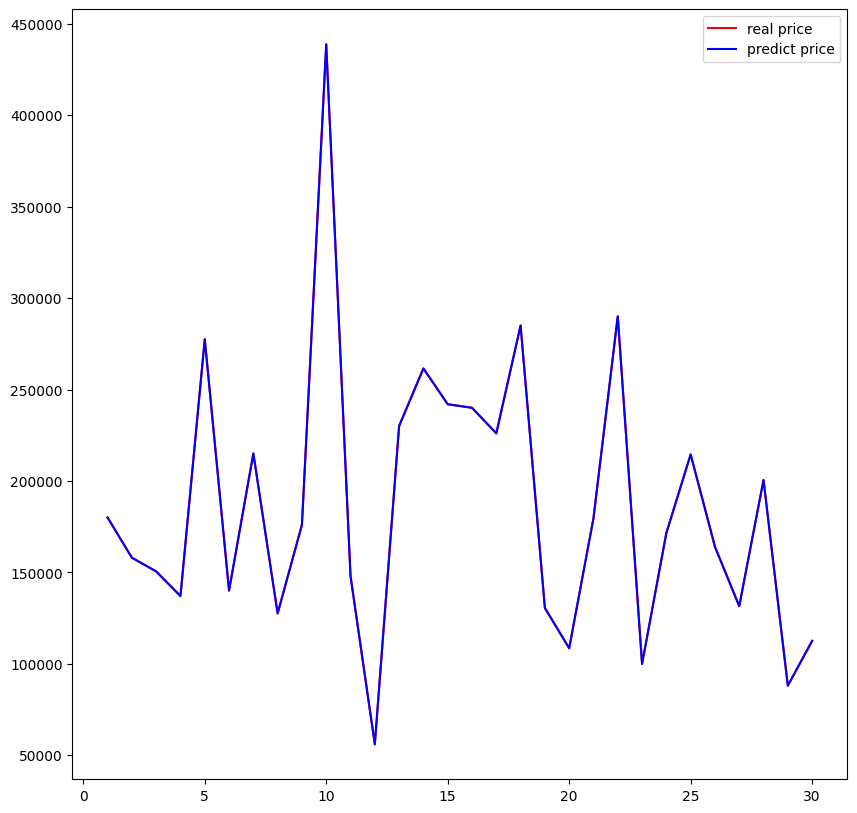

In [148]:
plt.figure(figsize=(10,10))    
plt.plot(X_num, real_price, c='red',label='real price')
plt.plot(X_num, predict_price,c='blue',label='predict price')
plt.legend()

plt.show()

In [ ]:
# test 데이터 불러 옴
df1 = pd.read_csv('./data/house_test.csv')

df1 = df1.dropna(axis=1, thresh=400)

df1 = pd.get_dummies(df1)
df1 = df1.fillna(df1.mean())

In [112]:
df1.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=260)

In [119]:
#  원하는 컬럼만 가져 옴
X_test = df1[cols]
y_pred = model.evaluate(X_test)

46/46 [==============================] - 0s 852us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
